Found 2400 files belonging to 10 classes.
Using 1920 files for training.
Found 2400 files belonging to 10 classes.
Using 480 files for validation.
Found 300 files belonging to 10 classes.
✅ Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

✅ Model Summary:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 2,872,570 (10.96 MB)

 Non-trainable params: 3,059,552 (11.67 MB)

Epoch 1/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.3033 - loss: 2.0768 - val_accuracy: 0.8750 - val_loss: 1.0091
Epoch 2/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8279 - loss: 0.9764 - val_accuracy: 0.9271 - val_loss: 0.4282
Epoch 3/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.8923 - loss: 0.5288 - val_accuracy: 0.9396 - val_loss: 0.2734
Epoch 4/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9106 - loss: 0.3618 - val_accuracy: 0.9438 - val_loss: 0.2116
Epoch 5/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9482 - loss: 0.2366 - val_accuracy: 0.9521 - val_loss: 0.1821
Epoch 6/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9483 - loss: 0.2077 - val_accuracy: 0.9563 - val_loss: 0.1581
Epoch 7/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9645 - loss: 0.1515 - val_accuracy: 0.9521 - val_loss: 0.1473
Epoch 8/15
60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9712 - loss: 0.1260 - val_accuracy: 0.9604 - v

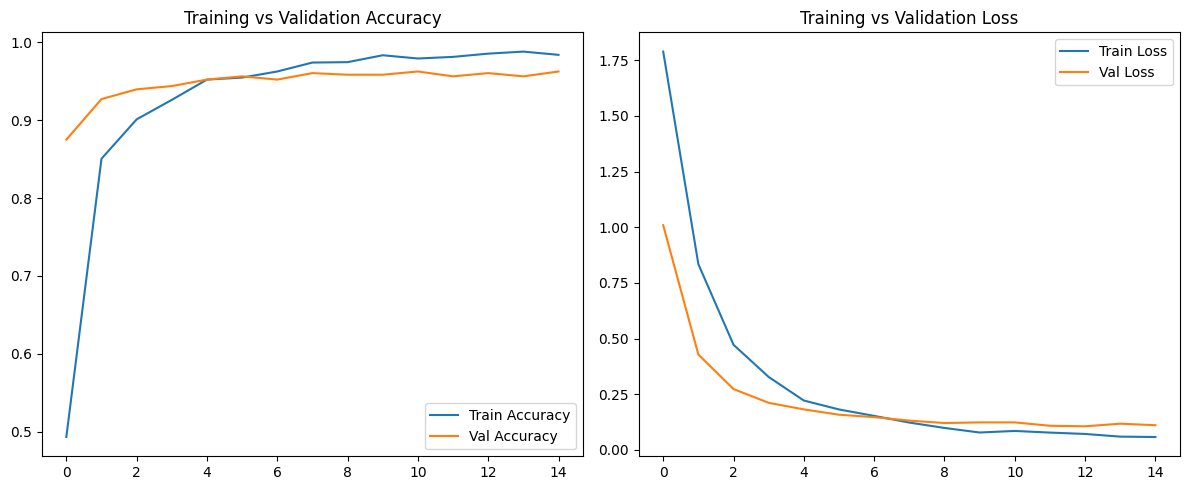

In [3]:
# === 1. Import Libraries ===
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === 2. Dataset Paths ===
train_path = r'C:\SnehaBarge\E-Waste Classification project\modified-dataset\train'
test_path = r'C:\SnehaBarge\E-Waste Classification project\modified-dataset\test'

# === 3. Parameters ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# === 4. Load Dataset ===
datatrain = image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset='training',
    seed=42,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

datavalid = image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset='validation',
    seed=42,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

datatest = image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = datatrain.class_names
print("✅ Classes:", class_names)

# === 5. Prefetch for Performance ===
AUTOTUNE = tf.data.AUTOTUNE
datatrain = datatrain.prefetch(buffer_size=AUTOTUNE)
datavalid = datavalid.prefetch(buffer_size=AUTOTUNE)
datatest = datatest.prefetch(buffer_size=AUTOTUNE)

# === 6. Data Augmentation ===
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# === 7. Load & Fine-Tune Base Model ===
base_model = EfficientNetV2B0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = True
# Freeze first N layers, fine-tune the rest
for layer in base_model.layers[:200]:  # Freeze first 200 layers
    layer.trainable = False

# === 8. Build Final Model ===
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet_v2.preprocess_input(x)
x = base_model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# === 9. Compile Model ===
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ Model Summary:")
model.summary()

# === 10. Callbacks ===
checkpoint_cb = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_accuracy', mode='max')
earlystop_cb = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# === 11. Train Model ===
history = model.fit(
    datatrain,
    validation_data=datavalid,
    epochs=15,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

# === 12. Evaluate on Test Data ===
loss, accuracy = model.evaluate(datatest)
print(f'\n✅ Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')

# === 13. Plot Accuracy & Loss ===
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()